<a href="https://colab.research.google.com/github/Kevincancino26/mis-notebook-de-estudio-/blob/main/Clasificacion_validacion_y_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Clasificaci√≥n: Validaci√≥n de modelos y m√©tricas de evaluaci√≥n**</h1>

### Proyecto

Una empresa de financiamiento de autom√≥viles est√° atravesando una situaci√≥n complicada, con una alta demanda para una flota reducida de veh√≠culos y un alto n√∫mero de morosos, lo que est√° generando grandes p√©rdidas para la empresa.

Nosotros fuimos contratados para buscar mejoras en la identificaci√≥n de morosos. El an√°lisis de los clientes actualmente se realiza de forma manual, cliente por cliente, lo que consume mucho tiempo y, aun as√≠, la detecci√≥n de morosos es muy imprecisa.

Nuestra tarea es utilizar los datos proporcionados por la empresa para **clasificar** a los clientes en cumplidores y morosos.

## <font color='dark'>Clasificando los datos</h1>

### Creando un modelo inicial

In [1]:
import pandas as pd

In [2]:
datos=pd.read_csv('/content/prestacar.csv')
datos.head()

ingresos_cliente  anualidad_prestamo  a√±os_casa_propia  telefono_trab  \
0           12600.0         3569.400000         12.157324              1   
1            9000.0         2722.188351          7.000000              0   
2           15750.0         4477.500000         12.000000              0   
3            9000.0         1309.050000         12.157324              0   
4            7650.0         1125.000000         12.157324              0   

   evaluacion_ciudad   score_1   score_2   score_3  score_social  \
0                2.0  0.057153  0.527227  0.513171      0.117428   
1                2.0  0.657661  0.285898  0.614414      0.222700   
2                2.0  0.501213  0.695423  0.513171      0.117428   
3                3.0  0.501213  0.155973  0.513171      0.117428   
4                2.0  0.294328  0.152076  0.513171      0.117428   

   cambio_telefono  moroso  
0           2545.0       0  
1            495.0       0  
2           1212.0       0  
3            515.0       0  
4            162.0       0

In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54025 entries, 0 to 54024
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ingresos_cliente    54025 non-null  float64
 1   anualidad_prestamo  54025 non-null  float64
 2   a√±os_casa_propia    54025 non-null  float64
 3   telefono_trab       54025 non-null  int64  
 4   evaluacion_ciudad   54025 non-null  float64
 5   score_1             54025 non-null  float64
 6   score_2             54025 non-null  float64
 7   score_3             54025 non-null  float64
 8   score_social        54025 non-null  float64
 9   cambio_telefono     54025 non-null  float64
 10  moroso              54025 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 4.5 MB


secmentacion del conjunto de datos para tener las variables explicativas y nuestra variable de respuesta

In [4]:
x=datos.drop('moroso',axis=1)
y=datos['moroso']

utilizando el modelo de clasificacion del arbol

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
modelo=DecisionTreeClassifier()
modelo.fit(x,y)
modelo.score(x,y)

1.0

In [7]:
print(f'La exactitud del modelo es: {modelo.score(x,y)}')

La exactitud del modelo es: 1.0


### Validando el modelo

Evaluar el modelo con los mismos datos utilizados en el entrenamiento no es recomendable. Es necesario que la evaluaci√≥n se realice con datos independientes.  

Evaluar el modelo con los propios datos de entrenamiento ser√≠a equivalente a entregar un examen con las preguntas y las respuestas a una persona y, al momento de evaluarla nuevamente, entregarle un examen con las mismas preguntas y opciones. Se espera que esa persona obtenga un buen resultado, ya que ya ha visto las respuestas y ha memorizado el resultado. Esto es diferente de haber aprendido la materia a partir de ese examen y luego presentar una prueba con contenido similar y obtener un resultado positivo.  

Con el objetivo de verificar la capacidad de generalizaci√≥n de un modelo, debemos dividir el conjunto de datos en tres partes: datos de entrenamiento, validaci√≥n y prueba.  

- El **conjunto de entrenamiento** se utiliza para entrenar los modelos. A partir de este conjunto, los modelos identifican patrones en los datos.  

- El **conjunto de validaci√≥n** se emplea para evaluar el desempe√±o de diferentes modelos con datos nuevos que no fueron utilizados en el entrenamiento.  

- El **conjunto de prueba** se mantiene separado desde el inicio para simular datos del mundo real. No se utiliza en ninguna etapa del entrenamiento ni de la validaci√≥n, sirviendo como una estimaci√≥n de la capacidad del modelo elegido para generalizar y predecir nuevos datos.

<a href="https://ibb.co/9H2Z1HZ5"><img src="https://i.ibb.co/0yZs6ysb/datos-train-test.png" alt="datos-train-test" border="0"></a>

este paquete lo que hace es separar la base de entrenamiento y la base de prueba nustros datos

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x,x_test,y,y_test=train_test_split(x,y,test_size=0.15,stratify=y,random_state=5)
x_train,x_val,y_train,y_val=train_test_split(x,y,stratify=y,random_state=5)

repetimos la missma linea y parametros para la validacion

In [10]:
modelo=DecisionTreeClassifier()
modelo.fit(x_train,y_train)
print(f'La exactitud del modelo del conjunto de entrenamiento es: {round(modelo.score(x_train,y_train))}')
print(f'La exactitud del modelo del conjunto de validacion es: {round(modelo.score(x_val,y_val),2)}')

La exactitud del modelo del conjunto de entrenamiento es: 1
La exactitud del modelo del conjunto de validacion es: 0.85


a la hora de correr el modelo de entrenamiento hizo 100% pero a la hora de validar hizo 85%, que quiere decir que mi modelo de arbol se memoriso todas las salidas y por eso llego al 100% y al momento de colocar datos que no habia visto por eso llego al 85%, esta no es la mejor forma para distanciar un modelo de arbol de decision si no debemos distanciar una profuncidad, colocar un parametro como:

In [11]:
modelo=DecisionTreeClassifier(max_depth=10)
modelo.fit(x_train,y_train)
print(f'La exactitud del modelo del conjunto de entrenamiento es: {modelo.score(x_train,y_train)}')
print(f'La exactitud del modelo del conjunto de validacion es: {(modelo.score(x_val,y_val))}')

La exactitud del modelo del conjunto de entrenamiento es: 0.9206445993031359
La exactitud del modelo del conjunto de validacion es: 0.9058444386377493


ahora obervamo que durante el entrenamiento llego al 92% y al momento de la validadcion fue de un 90%, lo que nos indica que esta validando mejor el modelo, y solo al ajustar un parametro

### Evaluando el modelo

anteriormente vimos los porcentajes el cual al poner metrica, nos indica que esta generalizando bien nuestro modelo pero que esta generalizando bien, esto es cuando decimos exactitud, pero que generalizo? no nos dice cantidad de clientes o clientes morosos por lot anto la exactitud no nos dice mucho hacerca de ciertos parametros, solo nos dice si generaliza bien o no,  pero no a detalle o si esto es de nuestro interes.

por lo tanto usaremos la matriz de confucion para la validacion de nuestros modelos

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
y_previsto=modelo.predict(x_val)
matriz_confucion=confusion_matrix(y_val,y_previsto)
print(matriz_confucion)

[[10358   121]
 [  960    42]]


esto hara la comparacion de los valores reales y los previstos del modelo

asi mismo observamos que nos da una matriz pero esto que es que de nuestros datos, para saber vamos hacer lo siguiente

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

esta herramienta nos permitira crear nuestra matriz de confucion dibujarla

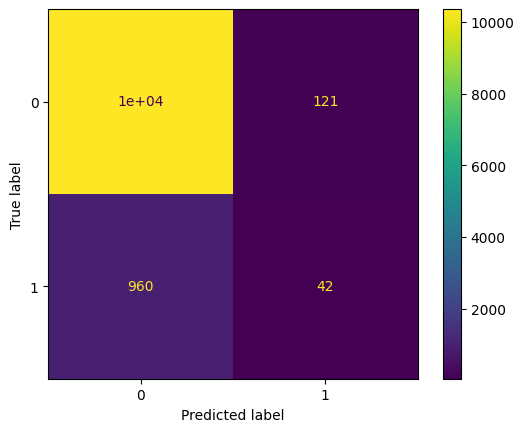

In [15]:
visualizacion=ConfusionMatrixDisplay(matriz_confucion)
visualizacion.plot();#con le punto y coma se extrae esa parte si no, tendriamos que importar
#matplotlip para usar el plt.show

en el eje y tenemos los valores reales 0 siendo cumplido y 1 siedno moroso, en el eje x tenemos los valores vebistos 0 siedno cumplido y 1 siendo moroso

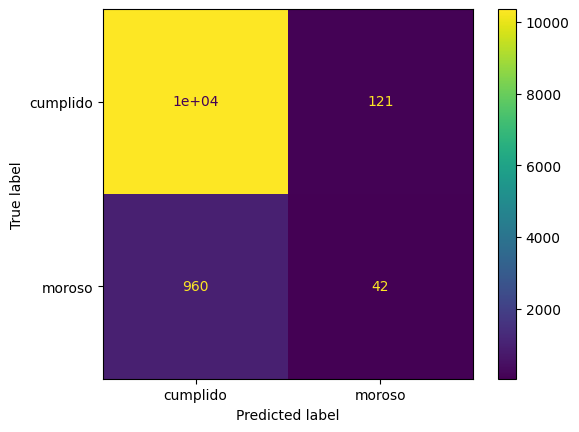

In [16]:
visualizacion=ConfusionMatrixDisplay(confusion_matrix=matriz_confucion,display_labels=['cumplido','moroso'])
visualizacion.plot();#ahora para mayor visualizacion vamos a poner parametros para asi entender mejor la informacion

que quiere decri la matriz de confucion: nos dice que nuestro modelo predijo de todo el conjunto de datos, que tuvimos mas 10000 clientes cumplidos, pero que tuvimos 957 clientes que se clasificaron como cumplidos pero que son morosos siendo esto un riesgo grande por la cantidad que son, 123 que se clasificaron como morosos y que son cumplidos, unicamente identifico de formaefectiva 45 clientes que son morosos y de la misma forma mas de 10000 clientes que son cumplidos


estos numero aqui que nos van a permitir evaluar nuestro modelo para mejorarlo y asi poder preorisar los casos en que los clientes son morosos, asi tener un mejor filtro para los filtros, dadoq ue por ejemplo le dejariamos de dar prestamos a 123 clientes que si nos pagarian bien pero le seguimos dando prestamos a 957 clientes que no nos pagarian bien, entonces aqui estamos asumiendo un riesgo muy grande o potencialmente

####Entendiendo la matriz de confusi√≥n

Para obtener una evaluaci√≥n m√°s completa del desempe√±o de modelos de clasificaci√≥n, podemos utilizar una herramienta conocida como matriz de confusi√≥n. Esta matriz ofrece ventajas a la persona cient√≠fica de datos, ya que permite entender cu√°ntos errores y aciertos tiene las predicciones de un modelo. En lugar de una tasa de acierto general, la matriz es capaz de proporcionar informaci√≥n en una visualizaci√≥n para cada una de las categor√≠as de la variable objetivo.

Piensa en un sistema de seguridad de un edificio que utiliza c√°maras para identificar personas que entran. La "matriz de confusi√≥n" se vuelve valiosa, ya que permite verificar cu√°ntas veces el sistema acert√≥ al identificar correctamente a las personas autorizadas, cu√°ntas veces acus√≥ err√≥neamente a personas y cu√°ntas veces dej√≥ pasar a personas no autorizadas. Con estos n√∫meros, es posible ajustar el sistema para minimizar falsos positivos y negativos, mejorando su precisi√≥n en la detecci√≥n de visitantes.

En la representaci√≥n general de una matriz de confusi√≥n, para m√°s detalles analiza la imagen a continuaci√≥n, las filas de la matriz corresponden a los valores reales de la base de datos, mientras que las columnas corresponden a los valores previstos por el modelo de clasificaci√≥n. Las categor√≠as de la variable objetivo est√°n representadas por el valor 0 (ausencia del atributo), tambi√©n llamado negativo, y por el valor 1 (presencia del atributo), tambi√©n llamado positivo.

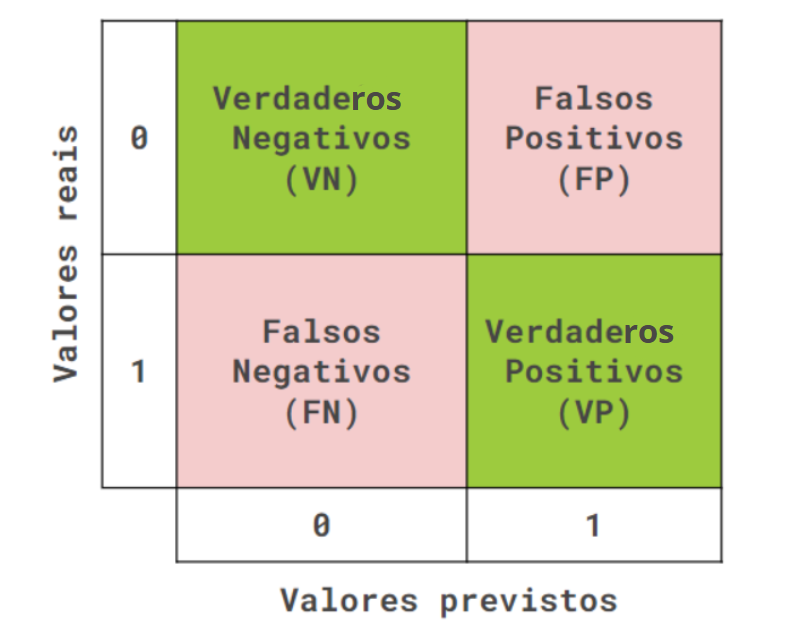

Cada elemento de la matriz est√° identificado por un nombre de acuerdo con la intersecci√≥n entre la predicci√≥n y el valor real. La diagonal principal de la matriz, que est√° destacada por el color verde, representa los elementos que tienen la predicci√≥n igual al valor real, por lo tanto son los aciertos del modelo. Por otro lado, la diagonal secundaria, que est√° destacada por el color rojo, representa los elementos con predicciones diferentes del valor real, por lo tanto son los errores del modelo. La descripci√≥n de cada uno de los elementos es la siguiente:


* Verdaderos Negativos (VN): Cuando el valor real es 0 y la predicci√≥n tambi√©n es 0. Indica que el modelo clasific√≥ correctamente los valores de la clase negativa.

* Falsos Positivos (FP): Cuando el valor real es 0 y la predicci√≥n es 1. Indica que el modelo clasific√≥ err√≥neamente un elemento de la clase negativa como si fuera de la clase positiva.

* Falsos Negativos (FN): Cuando el valor real es 1 y la predicci√≥n es 0. Indica que el modelo clasific√≥ err√≥neamente un elemento de la clase positiva como si fuera de la clase negativa.

* Verdaderos Positivos (VP): Cuando el valor real es 1 y la predicci√≥n tambi√©n es 1. Indica que el modelo clasific√≥ correctamente los valores de la clase positiva.

Estos valores son muy √∫tiles para un an√°lisis m√°s profundo del modelo de clasificaci√≥n. Esto permite identificar las capacidades y limitaciones de la predicci√≥n, si hay un equilibrio entre los aciertos y errores o si el resultado est√° sesgado hacia una clase en detrimento de la otra. Con esto, es evidente que la matriz de confusi√≥n es una herramienta mucho m√°s completa que la m√©trica de precisi√≥n, que representa solo el porcentaje de aciertos del modelo, sin considerar las clases de manera aislada.

##Metodo RandomForestClassifier

Se recomienda utilizar m√°s de un modelo de clasificaci√≥n en proyectos de machine learning, para que se comparen los resultados y se elija aquel modelo que tenga un mejor desempe√±o, despu√©s de todos los an√°lisis y mejoras.

Utilizamos durante la clase el algoritmo de √°rbol de decisi√≥n, pero la biblioteca Scikit-Learn tiene varios otros m√©todos de clasificaci√≥n que pueden ser utilizados en nuestro proyecto. Como desaf√≠o, utiliza el algoritmo Random Forest para crear un modelo y evaluar el desempe√±o con la precisi√≥n y la matriz de confusi√≥n, y compara los resultados con el resultado del √°rbol de decisi√≥n.

Como un consejo, revisa la documentaci√≥n del algoritmo RandomForestClassifier. Explora este material y observa c√≥mo importar la funci√≥n. Durante este proceso, recuerda verificar los par√°metros del m√©todo para evitar que el modelo se ajuste demasiado a los datos de entrenamiento.

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
modelo_random_forest=RandomForestClassifier(max_depth=10)
modelo_random_forest.fit(x_train,y_train)

RandomForestClassifier(max_depth=10)

In [19]:
print(f'Precision del modelo de entrenamiento es:{modelo_random_forest.score(x_train,y_train)}')
print(f'Precision del modelo de validadcion es: {modelo_random_forest.score(x_val,y_val)}')

Precision del modelo de entrenamiento es:0.9153890824622531
Precision del modelo de validadcion es: 0.9128995732079087


al observar el porcentaje de precision podemos observar que tuvo un pocentaje mejor que el del arbol de decision tanto en entrenamiento como en prueba

Matriz de decision

In [20]:
y_previsto_forest=modelo_random_forest.predict(x_val)
matriz_confucion_forest=confusion_matrix(y_val,y_previsto_forest)
print(matriz_confucion_forest)

[[10476     3]
 [  997     5]]


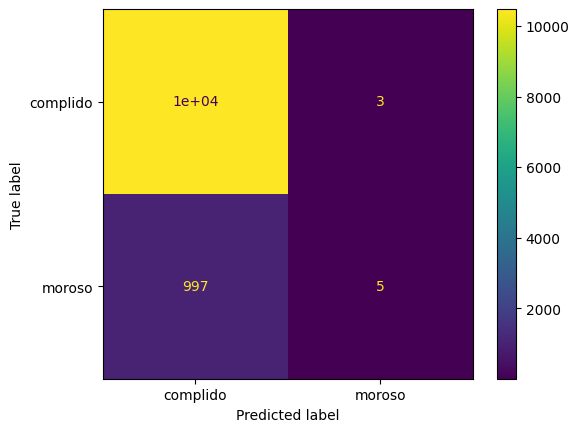

In [21]:
visualizacion_forest=ConfusionMatrixDisplay(confusion_matrix=matriz_confucion_forest,display_labels=['complido','moroso'] )
visualizacion_forest.plot();

al ver la grafica de decision podemos observar que el modelo randomforest no logra detectar casi ningun cliente moroso como el modelo anterior aun teniendo un porcentaje mayor

#### Lo que aprendimos

* Crear un modelo de clasificaci√≥n usando Scikit-Learn;
* Validar modelos a partir de la divisi√≥n de datos de entrenamiento, validaci√≥n y prueba;
* Evaluar el rendimiento de los modelos usando la precisi√≥n;
* Analizar los aciertos y errores del modelo con la matriz de confusi√≥n.

## <font color='dark'>M√©tricas de evaluaci√≥n</h1>

### Exactitud, precisi√≥n y recall (sensibilidad).

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

metricas para evaluar

<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

precision:son los verdaderos positivos dividido entre verdaderos positivos mas falsos positivos

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

In [23]:
45/(45+123)

0.26785714285714285

In [24]:
print(f' la presicion del modelo es: {precision_score(y_val,y_previsto)}')
print(f' la sencibilidad(recall) del modelo es: {recall_score(y_val,y_previsto)}')
print(f' la exactitud del modelo es: {accuracy_score(y_val,y_previsto)}')

 la presicion del modelo es: 0.25766871165644173
 la sencibilidad(recall) del modelo es: 0.041916167664670656
 la exactitud del modelo es: 0.9058444386377493


In [25]:
print(f' la presicion del modelo es: {f1_score(y_val,y_previsto)}')#penalisa el modelo, entre mas lejos de 1 el modelo se desempe√±a mal

 la presicion del modelo es: 0.07210300429184549


####cu√°ndo usar cada m√©trica

**Exactitud**

Es la m√©trica m√°s com√∫n y b√°sica en problemas de clasificaci√≥n. **Se utiliza para medir la proporci√≥n de datos previstos correctamente por el modelo en relaci√≥n al total de los datos.** Esta m√©trica es √∫til cuando las clases de la variable objetivo est√°n balanceadas, es decir, cuando hay una cantidad equilibrada de datos para cada clase y una importancia equivalente de clasificaci√≥n entre las categor√≠as. Como ejemplo de utilizaci√≥n, tenemos el reconocimiento de d√≠gitos manuscritos. Podemos utilizar im√°genes de caracteres de letras y n√∫meros para entrenar un modelo de clasificaci√≥n para identificar correctamente la escritura. Como cada letra o n√∫mero no tiene una importancia mayor que los dem√°s, la exactitud se convierte en una buena m√©trica para medir la capacidad del modelo en clasificar correctamente los d√≠gitos.

A continuaci√≥n, podemos analizar el c√°lculo de la exactitud a partir de la matriz de confusi√≥n. Se calcula sumando los aciertos del modelo (VN + VP) y dividiendo por todos los aciertos y errores (VP + VN + FP + FN).



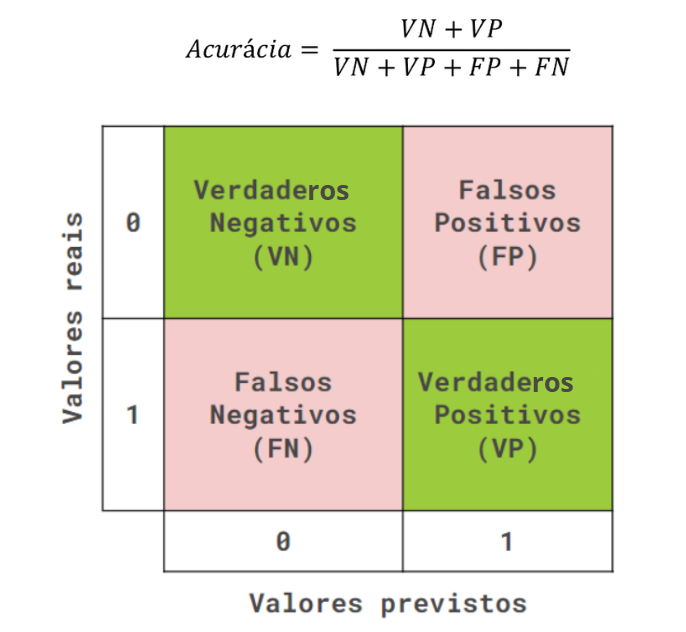

Recuperaci√≥n (recall)

Mide la proporci√≥n de datos positivos que fueron correctamente identificados por el modelo, es decir, revela la capacidad del modelo en evitar la clasificaci√≥n incorrecta de datos positivos como negativos. Se usa cuando el riesgo o costo de clasificar falsos negativos es alto. Por ejemplo, en casos de diagn√≥stico de enfermedades graves, donde es fundamental detectar correctamente la presencia de la enfermedad.

A continuaci√≥n, podemos constatar el c√°lculo del recall a partir de la matriz de confusi√≥n. El recall solo toma en cuenta los valores positivos reales, es decir, los valores de la segunda fila de la matriz. Se calcula a partir de la divisi√≥n entre Verdaderos Positivos (VP) y la suma de todos los positivos reales (VP + FN):

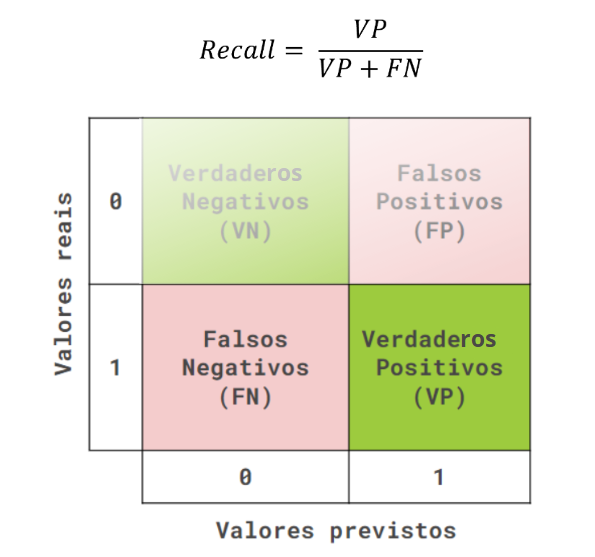

**Preciosion**

Mide la proporci√≥n de datos clasificados como positivos que son realmente positivos, es decir, revela la capacidad del modelo en evitar la clasificaci√≥n incorrecta de datos negativos como positivos. Se usa cuando el riesgo o costo de clasificar falsos positivos es alto, por ejemplo, en casos de selecci√≥n de acciones en el mercado financiero, donde lo importante es seleccionar acciones que tengan gran probabilidad de retorno, reduciendo la cantidad de acciones malas (falsos positivos) incluso si otras buenas acciones no han sido detectadas por el modelo (falso negativo). La precisi√≥n tambi√©n es importante en el ejemplo de detecci√≥n de enfermedades, donde queremos evitar que pacientes sanos sean err√≥neamente clasificados como enfermos.

A continuaci√≥n, podemos analizar el c√°lculo de la precisi√≥n a partir de la matriz de confusi√≥n. La precisi√≥n solo toma en cuenta los valores positivos previstos por el modelo, es decir, los valores de la segunda columna de la matriz. Se calcula a partir de la divisi√≥n entre Verdaderos Positivos (VP) y la suma de todos los positivos previstos (VP + FP):

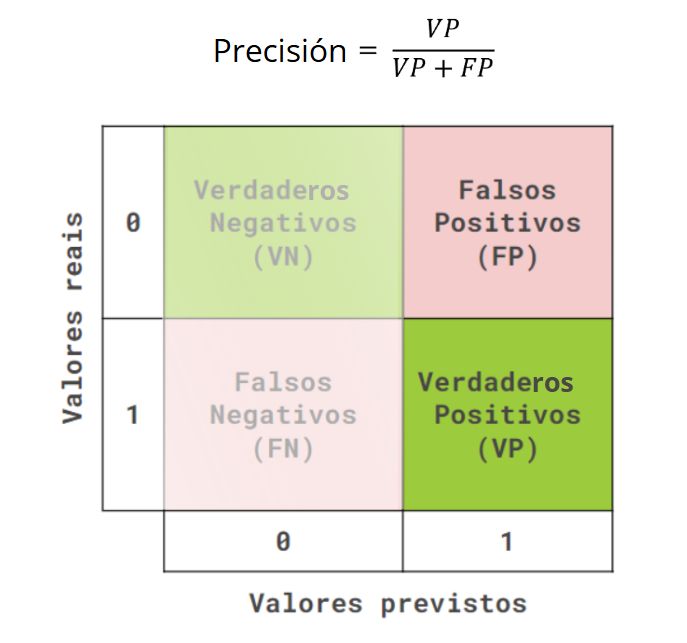

F1-Score

Proporciona un equilibrio entre el recall y la precisi√≥n, siendo √∫til cuando las clases de la variable objetivo est√°n desbalanceadas, es decir, cuando hay una cantidad de datos muy diferente para cada clase. Adem√°s, es aplicable cuando el riesgo o costo de falsos positivos y de falsos negativos es alto simult√°neamente. En casos de detecci√≥n de tumores en pacientes, es necesario tener un equilibrio entre evitar errores en la detecci√≥n de tumores cuando la persona realmente los tiene y evitar errores al informar que una persona tiene un tumor cuando en realidad no lo tiene.

El c√°lculo del F1-Score se realiza a partir de la media arm√≥nica entre la precisi√≥n y el recall. Por lo tanto, equivale a 2 veces la precisi√≥n por el recall, dividido por la suma entre la precisi√≥n y el recall:

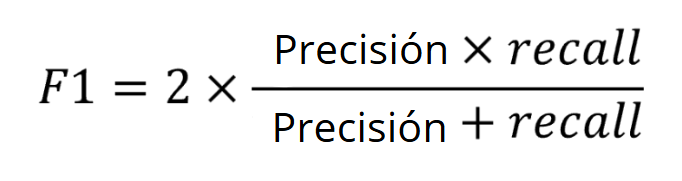

La elecci√≥n de la m√©trica de clasificaci√≥n adecuada depende del problema que se est√° resolviendo y de cada escenario. En los casos en que las clases est√°n balanceadas y tienen importancia similar, la exactitud puede ser una buena m√©trica inicial. Sin embargo, cuando las clases est√°n desequilibradas o los errores tienen costos diferentes, m√©tricas como precisi√≥n, recall y F1-score son m√°s indicadas.

### Curva ROC (caracteristica reseptiva del receptor)

In [26]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/dariyasydykova/open_projects/master/ROC_animation/animations/cutoff.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)




con python y sklearn podemos medir como esta la curba AUC de nuestro modelo

In [27]:
from sklearn.metrics import RocCurveDisplay

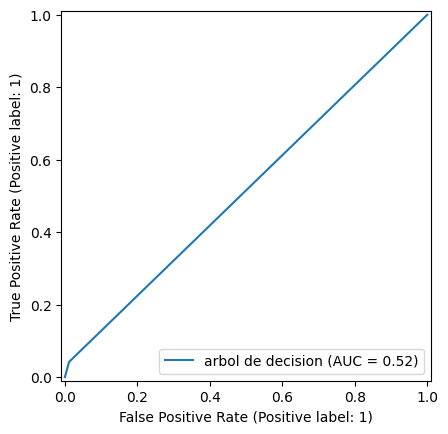

In [28]:
RocCurveDisplay.from_predictions(y_val,y_previsto,name='arbol de decision');

al ver crecio y de ahi se fue recta, la recta nos dice que es aletoriedad lo que nos indica que entre mas ce acerca a esta los resultados son mas aleatorios en la curva roc, lo cual nos indica que el modelo no clasifica bien auqnue tiene una exactitud del 90% quedando claro que es un modelo decificnte

In [29]:
from sklearn.metrics import roc_auc_score

In [30]:
print(f'El area bajo la curva roc es: {roc_auc_score(y_val,y_previsto)}')

El area bajo la curva roc es: 0.5151846321671001


essta es una forma de validad nuestro modelo

La curva ROC (Receiver Operating Characteristic) es una herramienta utilizada para evaluar el desempe√±o de un modelo de clasificaci√≥n binaria. Se utiliza especialmente cuando se trabaja con probabilidades o scores, no solo etiquetas (0/1), y cuando queremos analizar c√≥mo var√≠a la sensibilidad y la especificidad seg√∫n distintos umbrales de decisi√≥n.

‚úÖ ¬øQu√© es la curva ROC?
Es una gr√°fica que representa la relaci√≥n entre:

TPR (True Positive Rate) = Sensibilidad =
ùëá
ùëÉ
ùëá
ùëÉ
+
ùêπ
ùëÅ
TP+FN
TP
‚Äã


FPR (False Positive Rate) =
1
‚àí
Especificidad
=
ùêπ
ùëÉ
ùêπ
ùëÉ
+
ùëá
ùëÅ
1‚àíEspecificidad=
FP+TN
FP
‚Äã


Cada punto de la curva corresponde a un umbral distinto (threshold) aplicado a la probabilidad para decidir si la clase es 1 o 0.

Ejes de la curva:

X: Tasa de falsos positivos (FPR)

Y: Tasa de verdaderos positivos (TPR)

Interpretaci√≥n:

Una curva m√°s cercana a la esquina superior izquierda indica un mejor modelo.

Una curva cerca de la diagonal (l√≠nea 45¬∞) indica que el modelo es casi aleatorio.

Una curva por debajo de la diagonal indica un modelo peor que el azar.

‚úÖ AUC (Area Under Curve)
Es el √°rea bajo la curva ROC. Valores t√≠picos:

1.0: Modelo perfecto

0.9 - 1.0: Excelente

0.8 - 0.9: Muy bueno

0.7 - 0.8: Aceptable

0.5: Aleatorio

### Curva de  precisi√≥n x sensibilidad

In [31]:
Image(url='https://paulvanderlaken.com/wp-content/uploads/2019/08/roc.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)


In [32]:
from sklearn.metrics import PrecisionRecallDisplay

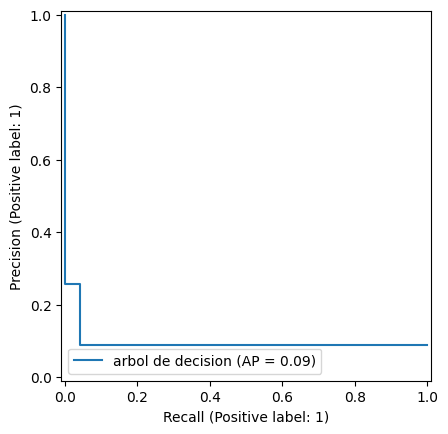

In [33]:
PrecisionRecallDisplay.from_predictions(y_val,y_previsto,name='arbol de decision');

aqui observamos el 26 y el 4 porciento de nuestros datos, ais mismo el promedio de el AP=0.09, la idea es que quede en 1 por lo tanto esto es deficiente

In [34]:
from sklearn.metrics import average_precision_score

In [35]:
print(f'El promedio de peciosion vs recall es: {round(average_precision_score(y_val,y_previsto),3)}')

El promedio de peciosion vs recall es: 0.094


 ¬øQu√© es la curva Precisi√≥n-Sensibilidad (Precision-Recall Curve)?
Es una representaci√≥n gr√°fica que muestra la relaci√≥n entre:

Precisi√≥n (Precision):

Precision
=
ùëá
ùëÉ
ùëá
ùëÉ
+
ùêπ
ùëÉ
Precision=
TP+FP
TP
‚Äã

‚Üí De todos los positivos que predijo el modelo, ¬øcu√°ntos son realmente positivos?

Sensibilidad (Recall o TPR):

Recall
=
ùëá
ùëÉ
ùëá
ùëÉ
+
ùêπ
ùëÅ
Recall=
TP+FN
TP
‚Äã

‚Üí De todos los positivos reales, ¬øcu√°ntos encontr√≥ el modelo?

Cada punto de la curva representa un umbral distinto (threshold) para decidir la clase positiva.

‚úÖ ¬øPor qu√© usarla?
Es m√°s informativa que la curva ROC cuando:

Hay desbalance de clases (ej.: 99% negativos y 1% positivos).

Nos interesa el trade-off entre capturar positivos (recall) y evitar falsos positivos (precision).

Mientras que la curva ROC puede dar una falsa impresi√≥n de buen rendimiento en datos desbalanceados, la curva Precision-Recall refleja mejor la calidad del modelo.

‚úÖ Interpretaci√≥n
Curva alta y hacia la esquina superior derecha = mejor modelo.



‚úÖ1. Baseline en la curva Precision-Recall
El baseline es la precisi√≥n esperada si predices al azar.

Si el 10% de tus datos son positivos, y clasificas al azar, tu precisi√≥n promedio ser√° 0.10.

Por eso, en la curva Precision vs Recall, se suele dibujar una l√≠nea horizontal en 0.10 para comparar tu modelo con el azar.

No tiene nada que ver con que AP = 1, es solo la referencia m√≠nima esperada.

‚úÖ 2. AP (Average Precision)
AP es el √°rea bajo la curva Precision-Recall, no un promedio simple, sino una integral ponderada:

AP
=
‚à´
0
1
Precision
(
ùëÖ
ùëí
ùëê
ùëé
ùëô
ùëô
)

ùëë
(
ùëÖ
ùëí
ùëê
ùëé
ùëô
ùëô
)
AP=‚à´
0
1
‚Äã
 Precision(Recall)d(Recall)
Rango del AP:

1.0 = Modelo perfecto (Precisi√≥n = 1 en todos los niveles de Recall).

Cercano al baseline (ej. 0.10) = Modelo casi aleatorio.

En la gr√°fica, AP se suele mostrar como:




```
ini
AP = 0.87
```


Eso indica la calidad global del modelo (cuanto m√°s cerca de 1, mejor).

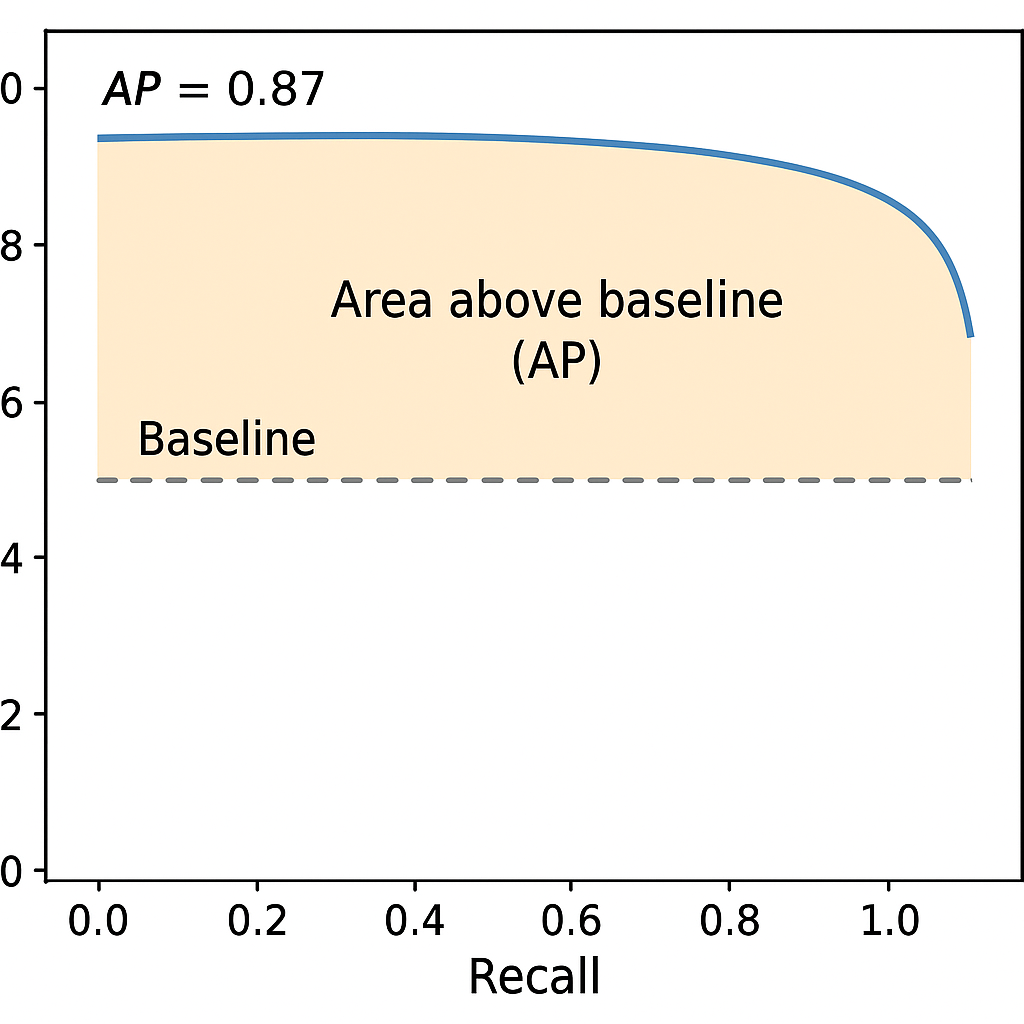

 ROC vs Precision-Recall: ¬øCu√°ndo usar cu√°l?

ROC Curve: Buen equilibrio si las clases est√°n balanceadas.

Precision-Recall Curve: Mejor para clases muy desbalanceadas porque enfatiza el rendimiento en la clase positiva.

### Informe de m√©tricas

podemos tner tambien un recurso que es un informe de emtricas

In [36]:
from sklearn.metrics import classification_report

In [37]:
print(f'{classification_report(y_val,y_previsto)}')

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.26      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.59      0.52      0.51     11481
weighted avg       0.86      0.91      0.87     11481



Tengo los puntajes de precisi√≥n, de recall, para cada una de las clases. Y, como estamos trabajando con recall, nota que este recall de 0.04 es, pues, deficiente, muy bajo. Y la precisi√≥n, tambi√©n, de 0.27, pues, muy mal, ¬øok? Entonces, este modelo, realmente, no identific√≥ bien a las personas morosas, porque en las personas morosas es lo que estamos tratando de clasificar.

Tambi√©n, en la parte inferior, tenemos la exactitud. A pesar de aparecer el puntaje de exactitud de 0.91, ¬øverdad? Bajo F1 score, realmente, es la exactitud. O sea, est√° tomando, haciendo la medida, como los c√°lculos que previamente mostramos. Entonces, es del 91%, pero eso no quiere decir que mi modelo est√© clasificando bien, ¬øok? Entonces, es un punto muy importante.

Tambi√©n, tenemos el promedio general, ¬øverdad? Que es lo que toma, es el valor de precisi√≥n. Lo suma y lo divide entre 2. Y lo mismo aqu√≠ para recall. Entonces, nota que el promedio general para la precisi√≥n es 0.59. Para recall, 0.52. El F1 es 0.51, siempre tomando como referencia las 11,500 muestras que tengo en el conjunto de entrenamiento y validaci√≥n.

Y el promedio ponderado, ¬øverdad? Adicionalmente, tiene en cuenta las muestras, ¬øok? Entonces, en este caso, el promedio ponderado es calculado precisi√≥n veces soporte, ¬øverdad? Dividido por la cantidad de muestras que hay. Y lo mismo para la clase 1. Entonces, precisi√≥n veces soporte dividido por la cantidad de muestras. Entonces, aqu√≠, este desbalanceo hace que lleguemos a estos promedios ponderados que acaban favoreciendo la clase m√°s frecuente, que ser√≠an las personas clientes cumplidas, ¬øok?

Este informe de m√©tricas es bastante √∫til

####Lo que aprendimos

* Seleccionar la m√©trica de clasificaci√≥n m√°s coherente de acuerdo con el problema;
* Extraer precisi√≥n, exactitud y recall a partir de la matriz de confusi√≥n;
* Generar gr√°ficos de la curva ROC y precisi√≥n x recall usando la biblioteca Sklearn;
* Construir un informe con las principales m√©tricas de rendimiento de modelos de clasificaci√≥n.

## <font color='dark'> Validaci√≥n cruzada</h1>

### Usando KFold

La validaci√≥n del modelo de clasificaci√≥n a partir de la separaci√≥n de los datos en conjuntos de entrenamiento y validaci√≥n hace que el resultado dependa en gran medida de esta divisi√≥n. Puede suceder que, de forma aleatoria, el patr√≥n de los datos de validaci√≥n sea diferente al de los datos de entrenamiento, lo que podr√≠a llevar a obtener un resultado mucho mejor o mucho peor que la realidad simplemente por suerte o mala suerte.  

Teniendo esto en cuenta, es posible utilizar la **validaci√≥n cruzada**, una estrategia m√°s consistente y ampliamente utilizada en proyectos de *machine learning*.  

En la validaci√≥n cruzada, en lugar de separar los datos en entrenamiento y validaci√≥n una sola vez, se dividen en varias partes de igual tama√±o. En cada una de estas divisiones, se usa una parte para validaci√≥n y todas las dem√°s para entrenamiento. Este proceso se repite hasta que todas las partes hayan sido utilizadas tanto para validaci√≥n como para entrenamiento.  

Se generar√° un modelo para cada una de estas divisiones y la evaluaci√≥n del desempe√±o se realizar√° promediando la m√©trica de cada modelo. Esto elimina la dependencia de la separaci√≥n de los datos, ya que hay una mayor variaci√≥n en la selecci√≥n de los mismos y se obtiene un valor medio.  

Generalmente, se utilizan 5 o 10 partes. Un n√∫mero mayor no suele ser necesario, ya que implica un procesamiento m√°s costoso, y valores menores ya ayudan a mitigar el problema de la selecci√≥n de los datos.

<a href="https://ibb.co/KcBtshJR"><img src="https://i.ibb.co/nq4X1mFZ/train-y-validacion.png" alt="train-y-validacion" border="0"></a>

In [38]:
from sklearn.model_selection import KFold,cross_validate

In [39]:
modelo=DecisionTreeClassifier(max_depth=10)
KFold=KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados=cross_validate(modelo,x,y,cv=KFold)
cv_resultados

{'fit_time': array([0.20680833, 0.19414473, 0.20151019, 0.19395113, 0.18993998]),
 'score_time': array([0.00276303, 0.00271463, 0.0027132 , 0.00272036, 0.00334549]),
 'test_score': array([0.91290147, 0.90744774, 0.90755662, 0.91343641, 0.89982578])}

el timepo que demoro para el fir, el tiempo que demoro en el puntaje y al final el puntaje

In [40]:
cv_resultados['test_score']

array([0.91290147, 0.90744774, 0.90755662, 0.91343641, 0.89982578])

como estimamos si esta generalizando bien y cual es el intervalo de confianza. Necesitamos calcular el promedio de estoss valores y luego el dessviao estandar
con esto calcularemos el intervalo de confianza= (promedio+2(desvioestandar))(promedio-2(desvioesstandar))

nota:la p√°rte ssuperior no supere uno

algo que tenemos en tener encuenta es si el valor del promedio es 0.99 y el desvio estandar es de 0.02, el intervalo de confianza supera el 1 y esto es algo que no podemos permitir

In [41]:
promedio= cv_resultados['test_score'].mean()
desvio_std=cv_resultados['test_score'].std()
print(f'el promedio de la exactitud es de: {promedio}')
print(f'el desvio tipico   es de: {desvio_std}')
print(f'el intervalo de confianza es de: [{(promedio-2*desvio_std),((promedio+2*desvio_std))}]')

el promedio de la exactitud es de: 0.9082336040620691
el desvio tipico   es de: 0.00491173101275947
el intervalo de confianza es de: [(np.float64(0.8984101420365501), np.float64(0.9180570660875881))]


quiere decir que nuestro modelo independientemente como sea el peor desempe√±o sera de 0.89 y el mejor 0.918, pero esstamoss hablando de un modelo para el cual solo calculamos la exactitud pero la metrica que queremos mejorar y priorisamos es el recall, teniendo el valor de verdaderos positivos lo mas alto posible demodo que nuesstro modelo redusca el error tipo II

### Validaci√≥n cruzada con sensibilidad

In [42]:
def intervalo_de_confianza(resultados):
  promedio= resultados['test_score'].mean()
  desvio_std=resultados['test_score'].std()
  print(f'el intervalo de confianza es de: [{(promedio-2*desvio_std),((promedio+2*desvio_std))}]')

In [43]:
from sklearn.model_selection import KFold,cross_validate
modelo=DecisionTreeClassifier(max_depth=10)
KFold=KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados=cross_validate(modelo,x,y,cv=KFold,scoring='recall')#colocamos el tipo de puntaje que vamos autilizar, que es el recall
cv_resultados

{'fit_time': array([0.19742203, 0.19958425, 0.20586109, 0.20159554, 0.20715117]),
 'score_time': array([0.004426  , 0.00511575, 0.00530529, 0.00488353, 0.00528288]),
 'test_score': array([0.02642008, 0.02227723, 0.02091021, 0.01174935, 0.02312139])}

In [44]:
intervalo_de_confianza(cv_resultados)

el intervalo de confianza es de: [(np.float64(0.011055444927654283), np.float64(0.030735855323075198))]


aqui la validacion cruzada para la sensibilidad funciona exactamente ogial que los pasos anteriores, ssolo que agregamoss el tipo de puntaje recall y este tiene un desvio estandar bastante grande dado que tenemos un intervalo de 0.012 a 0.030

este modelo sigue siendo deficiente y no lo hemos mejorado solo hemos validado, utilizar diversas t√©cnicas para la validaci√≥n con diversas m√©tricas de modo que podamos tomar acciones basados en los resultados que seamos data driven.

#####validaci√≥n con otras m√©tricas

Es siempre importante analizar el problema de negocio antes de evaluar un modelo de clasificaci√≥n, para que se elija la m√©trica m√°s adecuada. En nuestro proyecto, estamos clasificando clientes morosos de una agencia de alquiler de veh√≠culos e identificamos que la m√©trica m√°s relevante es el recall, que busca minimizar la cantidad de personas morosas que son clasificadas como cumplidoras.

Para obtener un resultado completo de las m√©tricas en la validaci√≥n cruzada as√≠ como el classification_report, es necesario utilizar el m√©todo cross_validate e informar en el par√°metro scoring las m√©tricas a evaluar.

Como desaf√≠o, construye un c√≥digo para generar el intervalo de confianza para cada una de las m√©tricas utilizando la validaci√≥n cruzada:

* Exactitud
* Recall
* Precisi√≥n
* F1-score


Un consejo es explorar la documentaci√≥n del m√©todo cross_validate a partir de este material de apoyo, donde puedes descubrir una forma m√°s simple de retornar las m√©tricas de una sola vez con una lista de cadenas.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate

In [45]:
from sklearn.model_selection import KFold,cross_validate
modelo=DecisionTreeClassifier(max_depth=10)
KFold1=KFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados1=cross_validate(modelo,x,y,cv=KFold1,scoring=['recall','accuracy','precision','f1'])
cv_resultados

{'fit_time': array([0.19742203, 0.19958425, 0.20586109, 0.20159554, 0.20715117]),
 'score_time': array([0.004426  , 0.00511575, 0.00530529, 0.00488353, 0.00528288]),
 'test_score': array([0.02642008, 0.02227723, 0.02091021, 0.01174935, 0.02312139])}

In [46]:
def intervalo_de_confianza1(resultados):
  for metrica in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
    promedio= resultados[metrica].mean()
    desvio_std=resultados[metrica].std()
    print(f'el intervalo de confianza ({metrica}) es de: [{(promedio-2*desvio_std),((promedio+2*desvio_std))}]')

In [47]:
intervalo_de_confianza1(cv_resultados1);

el intervalo de confianza (test_accuracy) es de: [(np.float64(0.8978577181033105), np.float64(0.918261062706941))]
el intervalo de confianza (test_recall) es de: [(np.float64(0.010895242485587419), np.float64(0.03129555625616809))]
el intervalo de confianza (test_precision) es de: [(np.float64(0.16585829795553103), np.float64(0.275112180713169))]
el intervalo de confianza (test_f1) es de: [(np.float64(0.02075025167947929), np.float64(0.056032311170586685))]


### Estratificando los datos

In [48]:
datos['moroso'].value_counts(normalize=True)

moroso
0    0.912707
1    0.087293
Name: proportion, dtype: float64

este metodo nos ayuda a estratificar nuestros datos de resultado de hacer la matriz crusada, dado que al momento de hacerla nuestros datos siguen estando desiguales en proporcion, en las pruebas por ende es necesario realizar esta estratificacion

In [49]:
from sklearn.model_selection import StratifiedKFold

In [50]:
modelo=DecisionTreeClassifier(max_depth=10)
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados=cross_validate(modelo,x,y,cv=skf,scoring='recall')#colocamos el tipo de puntaje que vamos autilizar, que es el recall


In [51]:
intervalo_de_confianza(cv_resultados)

el intervalo de confianza es de: [(np.float64(0.01977887384916223), np.float64(0.039588313675160546))]


Cuando hicimos la matriz crusada, en la porprocion de muestra sy de entrenmaiento, puede haberse quedado con diferentes porcentaje de datos cada una de los rangos de muestra de evaluacion, es decir, que un segmente de entrenamkento tenga el 100 de cumplidos y nada de morosos o visebersa
Esto nos hace correr el riesgo de que nuestro algoritmo no rste haciendo una valudacion crusada efectuva

Por ende usamos un metodo de sklearn lena que es un metodo de estratificacion  Stratifiedkefol

Los pasos son iguales a los que ya hemosnrealuzado, y en ves de utilizar Kfold sera stratifiedkefold, se queda la misma de split, shuffle y el random_state igual a 5, con esto garantisamos que la porporcion de cada clase se mantenga, queremos que todos estos grupos independiente como queden tengan un porcentaje de la clase moroso, por ejemplo quedo el 10% en cada grupo estaria bien

El intervalo cambio del primer caso, siendo esta de 0.019 a 0.036, el desvio tipico aumento, pero al princripio estoy teneindo un intervalo de confianza con una variaci√≥n que con este modelo puede presentar un puntaje de recall que varia de 1.9 y el 3.6 porciento no podemos esperar mas de este modelo y podemos notar un detalle dodne tenemos un conjunto de datos desequilibrado donde tenemos 50 mil registros que son personal cumplidas y casi 5 mil personas morosas por lo tento debemos mejorar la prevision

#### Otros metodos de validacion

Adem√°s de la validaci√≥n cruzada con KFold tradicional y estratificada, existen otros tipos de validaci√≥n que pueden ser utilizados en proyectos de machine learning. La elecci√≥n de su uso depender√° de las caracter√≠sticas de los datos del proyecto. Vamos a explorar m√°s adelante tres nuevos enfoques de separaci√≥n de los datos utilizados para simular el proceso de aprendizaje en datos futuros.

GroupKFold

El m√©todo GroupKFold es una variaci√≥n de la validaci√≥n cruzada KFold tradicional y se utiliza cuando los datos tienen alguna estructura de grupo o dependencia que no debe ser rota, generalmente una caracter√≠stica en una de las columnas de la base de datos.

Este enfoque utiliza una estrategia de separaci√≥n de los datos para que los registros pertenecientes a un grupo espec√≠fico se mantengan juntos durante las divisiones del KFold, garantizando que no sean separados entre los conjuntos de entrenamiento y validaci√≥n. Esto es √∫til para evitar posibles sesgos y garantizar que el modelo generalice para grupos desconocidos, es decir, incluso si no hay datos del grupo en el conjunto de entrenamiento, el modelo deber√° tener un buen desempe√±o al predecir el resultado para los datos de ese grupo.

Leave-p-out

El m√©todo Leave-p-out funciona de manera diferente al m√©todo KFold. En lugar de dividir el conjunto de datos en una cantidad fija de conjuntos, se elegir√° una cantidad 'p' de elementos para ser dejados fuera del entrenamiento. Los datos se entrenar√°n en el resto y se validar√°n solo en los 'p' elementos. Este proceso se repite hasta que todos los datos se utilicen como datos de validaci√≥n. El resultado final puede considerarse el promedio de los resultados obtenidos en los modelos, tal como se hace en la validaci√≥n cruzada tradicional.

Esto proporciona una validaci√≥n mucho m√°s completa, ya que considera todas las combinaciones posibles de datos de entrenamiento y validaci√≥n. Sin embargo, es mucho m√°s costosa computacionalmente, ya que se crear√°n muchos modelos y esto aumenta a medida que el conjunto de datos es muy grande y el valor elegido para 'p' es peque√±o.

Leave-one-out

El m√©todo Leave-one-out es una forma especial del Leave-p-out, donde se elige el valor de p=1. De esta manera, solo se reserva una muestra para validaci√≥n y todos los dem√°s datos se eligen para entrenamiento. Este proceso se repite para todas las muestras de la base de datos. Esto significa que, si hay 1000 filas en la base de datos, se entrenar√°n 1000 modelos distintos.

Se espera que este m√©todo demande mucho computacionalmente, debido a la creaci√≥n de un modelo para cada fila de la base de datos. Por lo tanto, se indica solo en los casos en que la base de datos es muy peque√±a. En estas situaciones, es interesante utilizar la mayor cantidad de datos posible para el entrenamiento, para que el modelo pueda entender el patr√≥n de los datos. Otra estrategia de validaci√≥n cruzada eliminar√≠a muchos datos que ser√≠an √∫tiles en el entrenamiento.


Si deseas saber m√°s sobre otros m√©todos de validaci√≥n disponibles en la biblioteca Scikit-Learn, puedes consultar la documentaci√≥n Validaci√≥n cruzada: evaluando el desempe√±o del estimador.
https://scikit-learn.org/stable/modules/cross_validation.html


Si quieres crear una visualizaci√≥n para tener un mejor entendimiento de c√≥mo se realiz√≥ la divisi√≥n de los datos en alg√∫n proyecto, ya sea con KFold, StratifiedKFold o GroupKFold, puedes explorar la documentaci√≥n Visualizando el comportamiento de validaci√≥n cruzada en scikit-learn.


https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html


####lo que aprendimos

* Utilizar la validaci√≥n cruzada con KFold para obtener un resultado m√°s coherente del desempe√±o de un modelo de clasificaci√≥n;
* Ejecutar la validaci√≥n cruzada con diferentes m√©tricas de evaluaci√≥n;
* Realizar la validaci√≥n cruzada estratificada en conjuntos de datos desbalanceados;
* Entender las ventajas y desventajas de los diferentes m√©todos de validaci√≥n.

## <font color='dark'>Balanceo de los datos</h1>

ante la problematica que los datos esten desvalanciados como es el caso de que los morosos son pocos, existe la tecnica de balanceo de datos, que son tecnicas que nos permitan identificar esta frotnera de decision, para llegar de forma mas precisa

### Oversampling

generamos datos sinteticos apartir de la clase que es la minoria de los datos, generando datos aleatorios para que nos hacerque al total de muestras que es la mayor

nos apollaremos de la biblioteca imbalanced-learn modulo smote, que es un algoritmo que nos permite facilitar este proceso de generacion aleatoria

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#id1

In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
oversampling=SMOTE()
x_balanceada,y_balanceada=oversampling.fit_resample(x,y)

In [54]:
y_balanceada.value_counts(normalize=True)

moroso
0    0.5
1    0.5
Name: proportion, dtype: float64

nos muestra la porporcion de que moroso nos quedo 50% cumplidos y 50% clientes cumplidos, al ejecutarlo sin porcentaje es de 41912, esto es para emular el comportamiento cuando el cliente es moroso

el sigueinte paso es intanciar el modelo de nuevo

In [55]:
modelo=DecisionTreeClassifier(max_depth=10)
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados=cross_validate(modelo,x_balanceada,y_balanceada,cv=skf,scoring='recall')#colocamos el tipo de puntaje que vamos autilizar, que es el recall

lo unico que cambia es que ahora son datos sinteticos x_balanceado,y_balanciado

In [56]:
intervalo_de_confianza(cv_resultados)

el intervalo de confianza es de: [(np.float64(0.716250242573221), np.float64(0.7632789246495443))]


al observar el modelo con smot nos trae metricas totalmente diferentes, que paso de 2% de recall, a 70%, lo que esperamos de este modelo al ser entrenado con oversampling es que mi modelo generaliza entre el 70% a 75%, pero que tan confiable es este ejercicio dado que generamos mas de 49mil datos de forma sintetica, pero esto lo podemos generar apartir de una payplan de forma secuencial, para llegar a estos resultados de nuestro modelo de forma exasutiva a diferencia de la forma manual

#### balanceo de datos

En problemas de clasificaci√≥n, podemos encontrarnos con bases de datos en las que la variable objetivo contenga clases muy desbalanceadas, es decir, categor√≠as con frecuencias muy diferentes. Al entrenar un modelo con la variable desbalanceada, puede ser que el patr√≥n de los datos para la clase dominante sobresalga en relaci√≥n a la clase con menor frecuencia, generando un modelo con un desempe√±o muy bajo para clasificar la clase de menor frecuencia.

Para sortear estos problemas generados por la base de datos desbalanceada, podemos recurrir a dos soluciones que consisten en equilibrar los datos de la variable objetivo: undersampling y oversampling. Estas estrategias son √∫tiles para que el modelo pueda comprender mejor el patr√≥n de los datos, pero es importante destacar que tambi√©n tienen desventajas y consideraciones que debemos analizar antes de utilizarlas.

Oversampling

La estrategia de oversampling consiste en aumentar la cantidad de datos de la clase que tiene menor frecuencia hasta que tenga la misma cantidad que la clase de mayor frecuencia. De esta manera, el modelo prestar√° m√°s atenci√≥n al patr√≥n de los datos de la clase que ten√≠a menor frecuencia al principio y podr√° diferenciar mejor las dos clases.

Para aumentar la cantidad de datos necesitamos generar nuevos registros en la base de datos. Es posible utilizar un oversampling aleatorio para duplicar registros de manera aleatoria o usar una t√©cnica como SMOTE para generar datos sint√©ticos con un patr√≥n cercano a los datos existentes. La desventaja de esta estrategia es la posibilidad de sobreajuste del modelo, especialmente al utilizar el oversampling aleatorio. En este caso, el modelo puede especializarse demasiado en el patr√≥n de los datos que son muy parecidos o id√©nticos, ya que son copiados o generados sint√©ticamente.

Undersampling

La estrategia de undersampling es contraria al oversampling y consiste en reducir la cantidad de datos de la clase que tiene mayor frecuencia hasta que tenga la misma cantidad que la clase de menor frecuencia. De esta forma, el modelo no prestar√° atenci√≥n solo a los datos de mayor cantidad y podr√° diferenciar mejor las dos clases.

Para reducir la cantidad de datos, necesitamos eliminar o borrar registros existentes. Es posible utilizar un undersampling aleatorio para seleccionar los registros que se mantendr√°n o usar t√©cnicas que seleccionan o eliminan datos a partir de un patr√≥n establecido. La principal desventaja de la estrategia de undersampling es la eliminaci√≥n de datos que pueden ser muy importantes para la comprensi√≥n del problema, especialmente cuando esta eliminaci√≥n se realiza sin ning√∫n criterio, como es el caso del undersampling aleatorio.



Ambas estrategias son v√°lidas para intentar mejorar el desempe√±o de un modelo de clasificaci√≥n, pero debemos estar atentos al utilizarlas debido a los puntos negativos que son inherentes a cada uno de los m√©todos. En cualquier proyecto que utilice alguna de estas herramientas, se debe realizar un an√°lisis para identificar si realmente ayudaron o perjudicaron el desempe√±o del modelo de clasificaci√≥n.

####biblioteca imblearn

La clasificaci√≥n de datos desbalanceados puede convertirse en una tarea bastante desafiante, ya que el enfoque tradicional de entrenar un modelo utilizando estos datos a menudo lleva a resultados muy insatisfactorios, donde el modelo tiende a favorecer la clase con mayor cantidad de datos en detrimento de la otra.

Para abordar este tipo de situaci√≥n, la biblioteca imbalanced-learn(https://imbalanced-learn.org/stable/index.html), abreviada como imblearn, ofrece diversas t√©cnicas y herramientas con el objetivo de equilibrar la distribuci√≥n de las categor√≠as de la variable objetivo y mejorar el rendimiento de los modelos de machine learning. Las t√©cnicas consisten en algoritmos de reamostrado de oversampling, undersampling y algoritmos que combinan ambas estrategias simult√°neamente.

Algunos de los algoritmos de oversampling de la biblioteca:

RandomOversampler(https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html)

SMOTE(https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)

ADASYN(https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.ADASYN.html)

KMeansSMOTE(https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.KMeansSMOTE.html)

Algunos de los algoritmos de undersampling de la biblioteca:

RandomUnderSampler(https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html)

NearMiss(https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html)

ClusterCentroids(https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.ClusterCentroids.html)

TomekLinks(https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.TomekLinks.html)

Algoritmos que combinan las dos t√©cnicas de oversampling y undersampling:

SMOTEENN(https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTEENN.html)

SMOTETomek(https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTETomek.html)

Adem√°s de las t√©cnicas de balanceo de datos, la biblioteca proporciona herramientas para la construcci√≥n de pipelines de datos(https://imbalanced-learn.org/stable/references/pipeline.html), algoritmos de machine learning(https://imbalanced-learn.org/stable/references/ensemble.html) para datos desbalanceados y c√°lculos de m√©tricas de rendimiento de modelos(https://imbalanced-learn.org/stable/references/metrics.html).


### Pipeline para validaci√≥n

nuestro modelo hasta ahrotia esta funcionando bien dado que estamos trabajando el modelo con datos balanceados, usando el oversampling pero al momento de validad nuestros datos entraran desvalanceados, la idea es usar pipeline para validacion de datos mediante invalance learn

In [57]:
from imblearn.pipeline import Pipeline as imbpipeline #dado que se trata de una desvalanciada por nuestros datos
#asi no generar confucion con una pipeline normal

esta es una secuencia de tareas que nosotros ejecutamos, lo que haremos  es llevar una secuencia en todo nuestro proceso de entrenamiento y validacion utilizando desde luego SMOT

In [58]:
modelo= DecisionTreeClassifier(max_depth=10)
pipeline=imbpipeline([('oversample',SMOTE()),('arbol',modelo)])

In [59]:
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados3=cross_validate(pipeline,x,y,cv=skf,scoring='recall')#colocamos el tipo de puntaje que vamos autilizar, que es el recall


Entonces, nuestro pipeline va a tomar nuestra X, va a hacer el oversampling l√≥gicamente con X y Y para entrenar el modelo, pero al momento de realizar la validaci√≥n, no va a validar con datos irreales, sino que va a mantener las proporciones que el dataset original contiene. Esa es la forma correcta de realizar este tipo de validaci√≥n con oversampling.

In [60]:
intervalo_de_confianza(cv_resultados3)

el intervalo de confianza es de: [(np.float64(0.20196705648540675), np.float64(0.2954112206681513))]


### Undersampling

este metodo en ves de generar datos sinteticos, toma la clase de la mayoria y la reduce de modo que podamos tener los datos mas aprecidos, si no que el patron de datos que utilisamos para esta reduccion se hacemeje o tenga unas caractetisticas que faciliten de cierta forma esta generalizacion a la hora de modelar- usamos el metodo learnest

es un algoritmo que ahce esta reduccion de muestras de forma inteligente para poder generalisar bien con el conjunto de datos   

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

In [61]:
from imblearn.under_sampling import NearMiss

In [62]:
modelo= DecisionTreeClassifier(max_depth=10)
pipeline=imbpipeline([('undersample',NearMiss(version=3)),('arbol',modelo)])
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados4=cross_validate(pipeline,x,y,cv=skf,scoring='recall')#colocamos el tipo de puntaje que vamos autilizar, que es el recall


In [63]:
intervalo_de_confianza(cv_resultados4)

el intervalo de confianza es de: [(np.float64(0.6243480454160543), np.float64(0.6986577982768359))]


#### verisones del nearmiss

El desequilibrio de clases es un problema com√∫n en tareas de clasificaci√≥n en machine learning, como diagn√≥sticos m√©dicos, detecci√≥n de fraudes y detecci√≥n de anomal√≠as, donde la frecuencia de ocurrencia de un evento es muy baja en relaci√≥n con el total. Una de las estrategias para abordar este problema de datos desequilibrados es el undersampling, que busca reducir el n√∫mero de muestras de la clase con mayor frecuencia.

Entre los algoritmos de undersampling, podemos mencionar el NearMiss, que consiste en seleccionar muestras de la categor√≠a en mayor cantidad que tienen un patr√≥n cercano a la categor√≠a con menor cantidad, con el fin de preservar informaci√≥n importante para la modelaci√≥n del problema. Al utilizar un criterio de selecci√≥n de las muestras, este m√©todo es mucho m√°s recomendado que el uso de un undersampling puramente aleatorio, que puede eliminar informaci√≥n relevante de los datos.

Para seleccionar las muestras, este algoritmo utiliza un m√©todo conocido como vecino m√°s cercano. Este m√©todo se aplica en 3 pasos:

1er paso: se calculan distancias entre todas las muestras de la clase con mayor frecuencia y de la clase con menor frecuencia.

2¬∫ paso: a continuaci√≥n, para cada muestra de la clase de menor frecuencia, se seleccionan n muestras de la clase de mayor frecuencia; por defecto, este n√∫mero es 3 y de ah√≠ proviene el nombre de vecinos m√°s cercanos. Se seleccionan 3 vecinos m√°s cercanos para cada muestra de la clase de menor frecuencia.

3er paso: a partir de los elementos que fueron seleccionados, ocurre un nuevo proceso de selecci√≥n para que quede con la misma cantidad de elementos de la clase de menor frecuencia. Esta selecci√≥n final tiene 3 versiones diferentes:

NearMiss versi√≥n 1: se calcula un promedio entre las distancias de los 3 vecinos m√°s cercanos de cada muestra de la clase de mayor frecuencia y se eligen aquellos que tengan la menor media de distancia.

NearMiss versi√≥n 2: se calcula un promedio entre las distancias de los 3 vecinos m√°s lejanos de cada muestra de la clase de mayor frecuencia y se eligen aquellos que tengan la menor media de distancia.

NearMiss versi√≥n 3: se divide en dos etapas. Primero, para cada elemento de la clase de menor frecuencia, se eligen y almacenan M vecinos m√°s cercanos, por defecto M tambi√©n es de 3 vecinos. Luego se calcula el promedio de las distancias entre los elementos almacenados y los elementos de la clase de menor frecuencia y se eligen aquellos que tengan la mayor media de distancia.

Si desea saber m√°s sobre las versiones del NearMiss, consulte la documentaci√≥n de imbalanced-learn

https://imbalanced-learn.org/dev/under_sampling.html#mathematical-formulation

### Probando el modelo

hemos visto que el metodo mejor para generar el modelo es mediante el undersample, que es para la validacion de este deribado a la desigualdad de mis datos, ahora vamos a generar todo de amnera automatica

In [64]:
#primer paso
undersample=NearMiss(version=3)
#segundo paso
x_balanceada,y_balanceada=undersample.fit_resample(x,y)


In [65]:
#paso 3 crear modelo
modelo= DecisionTreeClassifier(max_depth=10)
#paso 4 hacer el fit
modelo.fit(x_balanceada,y_balanceada)
#paso 5 hacer el y previsto
y_previsto=modelo.predict(x_test)#hemos hecho hasta el momento con las x de validacion y entrenamiento ahora usaremos la variable test de x
#haciendo la prevision con datos que nunca vio en xtest

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



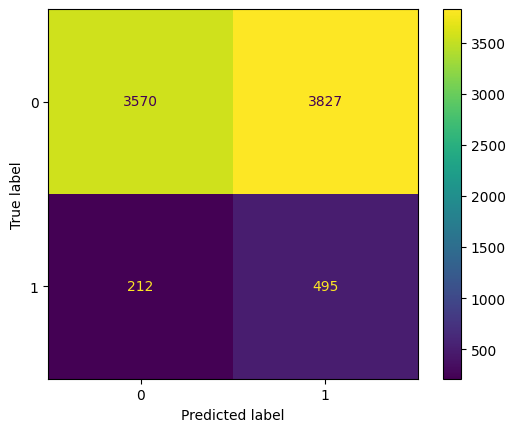

In [66]:
#paso 5 impresion y reporte
print(classification_report(y_test,y_previsto))
#paso 6 matriz de confucion
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto);

Entonces nota que aqu√≠ est√° nuestro modelo final ya probado con datos que nunca vio, lo entrenamos siguiendo las mejores pr√°cticas, trabajamos l√≥gicamente con un modelo de undersampling. O sea todo siguiendo todos estos patrones y llegamos entonces a este modelo interesante que logra predecir de forma correcta, 496 casos en los cuales se trata de un cliente moroso.

Entonces trajimos nuestra Y_test y nota que nuestro resultado de precisi√≥n, de recall, que es la m√©trica que quer√≠amos priorizar aqu√≠ de la clase, que son morosos fue del 70%, entonces encuentra todo dentro de este rango, dentro de este intervalo de confianza, 70% y desde luego pues sacrificamos la precisi√≥n, qued√≥ con precisi√≥n del 11%. ¬øCu√°l es el tradeoff?

Vuelvo a repetir, la idea de la empresa era dejar de perder dinero con clientes morosos porque no los estaban identificando correctamente. Ahora, est√°n identificando correctamente a los clientes morosos, pero a cambio, podr√≠an terminar prediciendo que clientes que son posiblemente buenos pagadores sean morosos. Por eso, estoy teniendo esta cantidad de falsos positivos, ¬øok?

Para la empresa, esto representa l√≥gicamente un riesgo que va a asumir. La idea es que no vamos a prestar a tantas personas, ¬øverdad? No vamos a financiar a tantas personas, pero a cambio, nos aseguraremos de identificar a los morosos antes de conocer las caracter√≠sticas de estos clientes morosos antes de prestarles. Vamos a proceder con pasos un poco m√°s seguros aqu√≠, trabajando con este modelo de Machine Learning (Aprendizaje Autom√°tico) para identificar a clientes morosos.

#### Utilizar oversampling y undersampling en datos desbalanceados;


Utilizar t√©cnicas de balanceo de datos y entender sus ventajas y desventajas;
Aplicar un pipeline junto con la validaci√≥n cruzada;
Probar modelos de clasificaci√≥n.

#otros m√©todos de balanceo

Durante la clase, exploramos dos estrategias de balanceo de datos: oversampling y undersampling. En cada una de ellas utilizamos un algoritmo diferente, el SMOTE para generar nuevos datos sint√©ticos y el NearMiss para mantener datos que tienen un patr√≥n cercano entre las clases.

Estos no son los √∫nicos algoritmos existentes y el oversampling y undersampling no necesitan ser utilizados de manera aislada. Es posible combinar las dos estrategias en una sola para equilibrar los puntos negativos de cada una de ellas. Esto no quiere decir que esta estrategia sea m√°s efectiva en todas las ocasiones, pero es una opci√≥n que puede ser explorada en los proyectos.

Como desaf√≠o, utiliza el algoritmo SMOTEENN, que combina el oversampling con SMOTE y el undersampling con el ENN (Edited Nearest Neighbours), para balancear los datos y observa los resultados obtenidos por el modelo usando el pipeline y la validaci√≥n cruzada.

Como un consejo, revisa la documentaci√≥n del m√©todo SMOTEENN a partir de este enlace para identificar c√≥mo importar el m√©todo y c√≥mo utilizarlo.

https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTEENN.html

In [67]:
from imblearn.combine import SMOTEENN

In [68]:
modelo= DecisionTreeClassifier(max_depth=10)
pipeline=imbpipeline([('SMOTEENN',SMOTEENN()),('arbol',modelo)])
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
cv_resultados5=cross_validate(pipeline,x,y,cv=skf,scoring='recall')

In [69]:
intervalo_de_confianza(cv_resultados5)

el intervalo de confianza es de: [(np.float64(0.3369214195537777), np.float64(0.393438074968344))]


El recall de este modelo estuvo alrededor de 0.33 a 0.39, un poco mejor que el resultado usando solamente el oversampling, pero peor que el resultado del undersampling. Por lo tanto, esta estrategia no fue tan eficiente para este caso, pero eso no significa que no pueda ser utilizada en otros proyectos.